<a href="https://colab.research.google.com/github/CaptaiN785/ML-Notebooks/blob/main/t-SNE-example/t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import seaborn as sns
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = datasets.load_breast_cancer()

In [8]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df.shape

(569, 30)

In [14]:
## There are 30 feature/dimension so, it is hard to visualize the data
## To visualize the data, convert into 2D or 3D

In [15]:
from sklearn.manifold import TSNE

In [21]:
## Some concept about parameters
TSNE().get_params()

# angle : Only used if method=’barnes_hut’ This is the trade-off between
#         speed and accuracy for Barnes-Hut T-SNE.
#         ‘angle’ is the angular size (referred to as theta in [3]) of a distant node as measured from a point.

# early_exaggeration: it is responsible for how tight cluster will be and it is applied for some iterration
#                     if it is running over time it may result to get more attractive force than repulsive

# init : It is the initializtion technique of intiallizing the weights

# method : barnes_hut is method which is used to calcualte the repuslive force but is works in O(nlog(n)),
#          but now some other methods are available which computes in O(n)

# min_grad_norm : If the gradient norm is below this threshold, the optimization will be stopped.

# n_components : no of cluster we want

# n_iter : no of iteration perform to find the clusters

# n_iter_without_progress':  it is used to run the early_exaggeration upto this iteration and
#                           this value is rounded to the next multiple of 50.

# perplexity : no of neighbours to be considered

# metric : it is the way of calculating the distance between the points by default is eucleadian method

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'warn',
 'learning_rate': 'warn',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': None,
 'square_distances': 'legacy',
 'verbose': 0}

In [65]:
tsne = TSNE(n_components=2, perplexity=30, random_state = 0, n_iter_without_progress=250, n_iter = 500)

In [66]:
tsne_data = tsne.fit_transform(df)

In [67]:
tsne_data # it will be used to train the model

array([[  2.6283512, -26.761576 ],
       [  4.737077 , -28.37874  ],
       [  6.9945617, -24.504622 ],
       ...,
       [ 16.348183 ,  -9.486079 ],
       [  5.7944226, -26.579884 ],
       [-23.99066  , -18.886839 ]], dtype=float32)

In [68]:
tsne_df = pd.DataFrame(tsne_data, columns = ['comp1', 'comp2'])

In [69]:
tsne_df['target'] = data['target']

In [70]:
tsne_df.head()

,comp1,comp2,target
0,2.628351,-26.761576,0
1,4.737077,-28.378740,0
2,6.994562,-24.504622,0
3,-16.187328,14.192652,0
4,9.284236,-24.353888,0


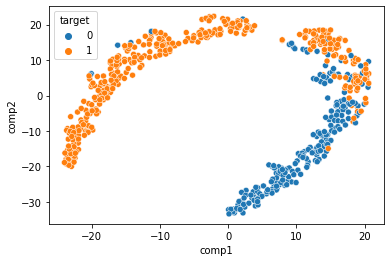

In [54]:
sns.scatterplot(data = tsne_df, x = 'comp1', y = 'comp2', hue = 'target')

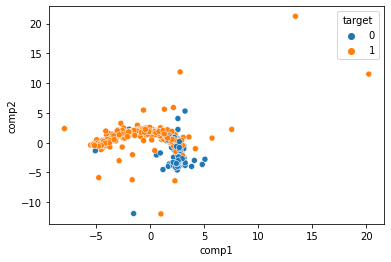

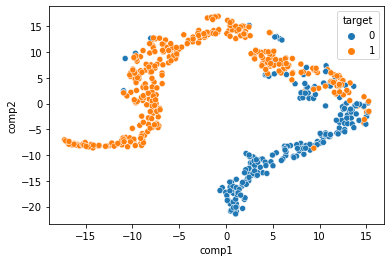

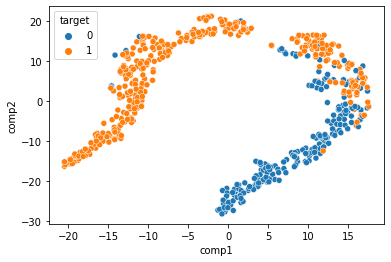

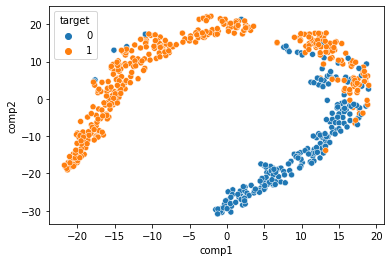

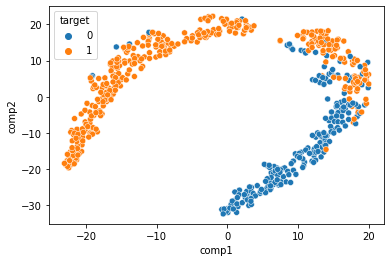

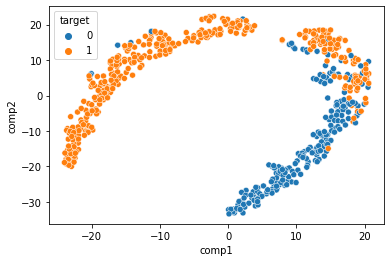

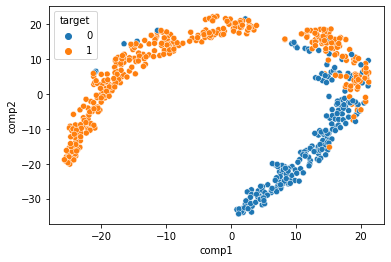

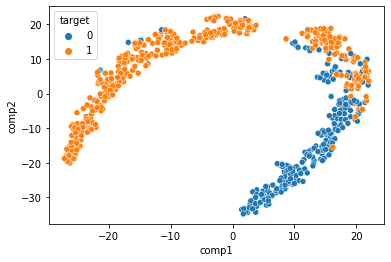

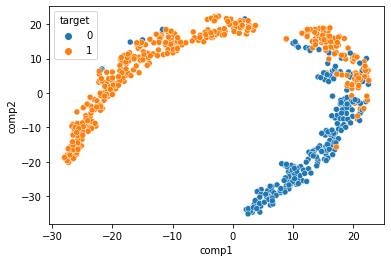

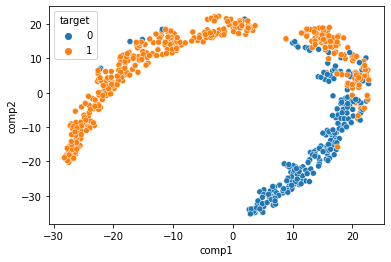

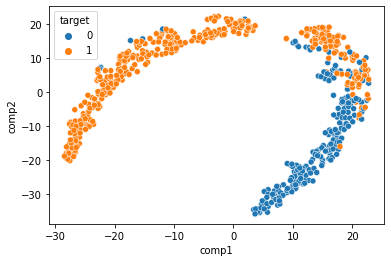

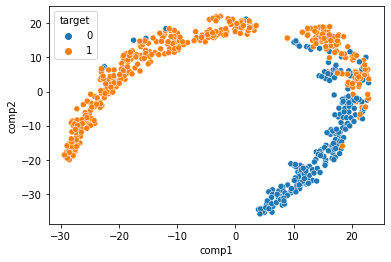

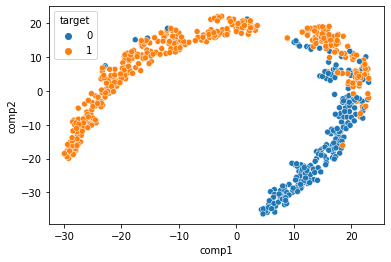

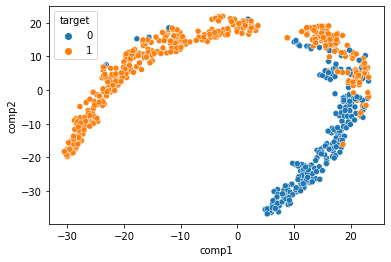

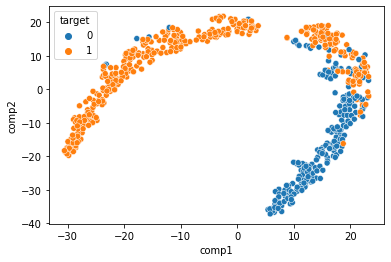

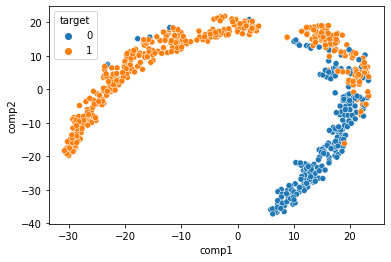

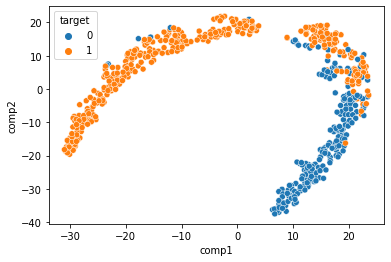

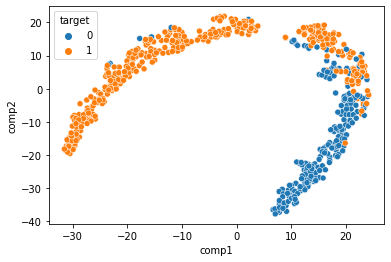

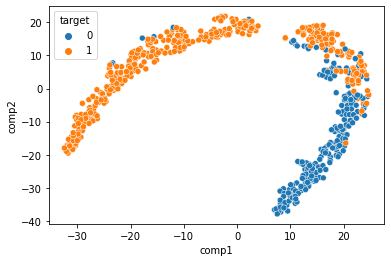

In [62]:
import warnings
warnings.filterwarnings("ignore")

## Plotting the graph per 50 iteration increased

for i in range(250, 1200,50):
    tsne = TSNE(n_components=2, perplexity=30, random_state = 0, n_iter_without_progress=350, n_iter = i)
    tsne_data = tsne.fit_transform(df)
    tsne_df = pd.DataFrame(tsne_data, columns = ['comp1', 'comp2'])
    tsne_df['target'] = data['target']
    sns.scatterplot(data = tsne_df, x = 'comp1', y = 'comp2', hue = 'target')
    plt.show()


In [64]:
## This is how the tsne works


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X = tsne_df.drop('target', axis = 1)
y = tsne_df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print("accuracy score : ", accuracy_score(pred, y_test))

print("classification_report\n", classification_report(pred, y_test))



accuracy score :  0.8859649122807017
classification_report
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        34
           1       0.95      0.89      0.92        80

    accuracy                           0.89       114
   macro avg       0.86      0.88      0.87       114
weighted avg       0.89      0.89      0.89       114



In [77]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN(10)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print("accuracy score : ", accuracy_score(pred, y_test))

print("classification_report\n", classification_report(pred, y_test))

accuracy score :  0.9298245614035088
classification_report
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.95      0.95      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

